**PRECOG RECRUITMENT TASK-1**<br>
Name: Ishan Kavathekar <br>
Roll no: 2022121003<br>
FILE: Judges_clean.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Precog/Precog/judges_clean.csv')
df.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018


In [ ]:
df.columns

Index(['ddl_judge_id', 'state_code', 'dist_code', 'court_no', 'judge_position',
       'female_judge', 'start_date', 'end_date'],
      dtype='object')

In [ ]:
df.describe()

,ddl_judge_id,state_code,dist_code,court_no
count,98478.000000,98478.000000,98478.000000,98478.000000
mean,49239.500000,9.981844,18.553748,46.726487
std,28428.294242,7.900817,14.205283,135.561819
min,1.000000,1.000000,1.000000,1.000000
25%,24620.250000,2.000000,8.000000,3.000000
50%,49239.500000,9.000000,16.000000,9.000000
75%,73858.750000,15.000000,26.000000,23.000000
max,98478.000000,30.000000,75.000000,999.000000


In [ ]:
df.isnull().sum()

ddl_judge_id          0
state_code            0
dist_code             0
court_no              0
judge_position        0
female_judge          1
start_date            0
end_date          18158
dtype: int64

In [ ]:
df.shape

(98478, 8)

In [ ]:
df['female_judge'].value_counts().index

Index(['0 nonfemale', '1 female', '-9998 unclear'], dtype='object')

In [ ]:
df['female_judge'] = df['female_judge'].replace('0 nonfemale','male')
df['female_judge'] = df['female_judge'].replace('1 female','female')
df['female_judge'] = df['female_judge'].replace('-9998 unclear','unclear')


In [ ]:
df['female_judge'].value_counts().index

Index(['male', 'female', 'unclear'], dtype='object')

In [ ]:
# Replaced NaN gender value with -9998
df['female_judge'] = df['female_judge'].replace(np.nan, "unclear")

In [ ]:
df_states = pd.read_csv('/content/drive/Shareddrives/Precog/Precog/Key/cases_state_key.csv')
df_states = df_states[['state_code' , 'state_name']]
df_states = df_states.drop_duplicates().sort_values('state_code')
df_states

,state_code,state_name
161,1,Maharashtra
0,2,Andhra Pradesh
134,3,Karnataka
143,4,Kerala
99,5,Himachal Pradesh
18,6,Assam
125,7,Jharkhand
27,8,Bihar
224,9,Rajasthan
242,10,Tamil Nadu


In [ ]:
# Merging the tables according to state_code and adding column of state name in 
df = pd.merge(df, df_states,on = 'state_code', how = 'left')

In [ ]:
df.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date,state_name
0,1,1,1,1,chief judicial magistrate,male,20-09-2013,20-02-2014,Maharashtra
1,2,1,1,1,chief judicial magistrate,male,31-10-2013,20-02-2014,Maharashtra
2,3,1,1,1,chief judicial magistrate,male,21-02-2014,31-05-2016,Maharashtra
3,4,1,1,1,chief judicial magistrate,male,01-06-2016,06-06-2016,Maharashtra
4,5,1,1,1,chief judicial magistrate,male,06-06-2016,07-07-2018,Maharashtra


In [ ]:
df_dist = pd.read_csv('/content/drive/Shareddrives/Precog/Precog/Key/cases_district_key.csv')
df_dist = df_dist[['dist_code' , 'district_name']]
df_dist = df_dist.drop_duplicates().sort_values('dist_code')
df_dist

,dist_code,district_name
168,1,Patna
133,1,Kamrup Metro
507,1,Dharmapuri
252,1,Kathua
497,1,Rajsamand
...,...,...
597,71,Santkabir Nagar
87,73,Hapur
84,74,Sambhal at Chandausi
555,75,Chandauli


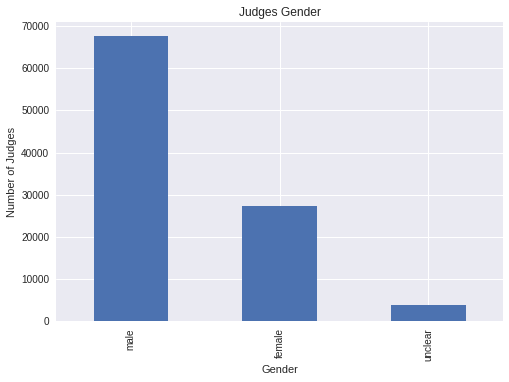

In [ ]:
df['female_judge'].value_counts().plot(kind='bar', x =['Male','Female','Unclear'] ,xlabel='Gender', ylabel='Number of Judges', title='Judges Gender')

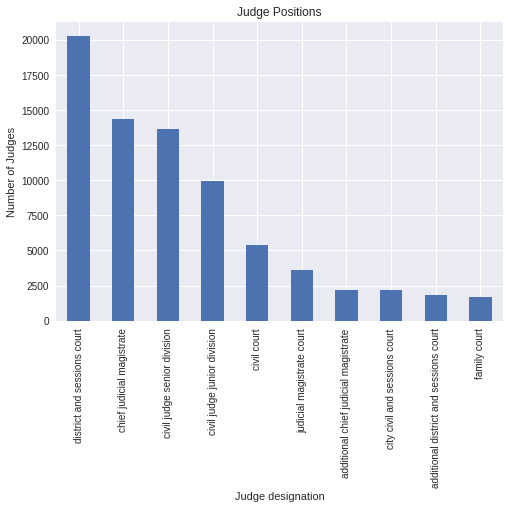

In [ ]:
df['judge_position'].value_counts()[:10].plot(kind='bar',xlabel='Judge designation', ylabel='Number of Judges', title='Judge Positions')

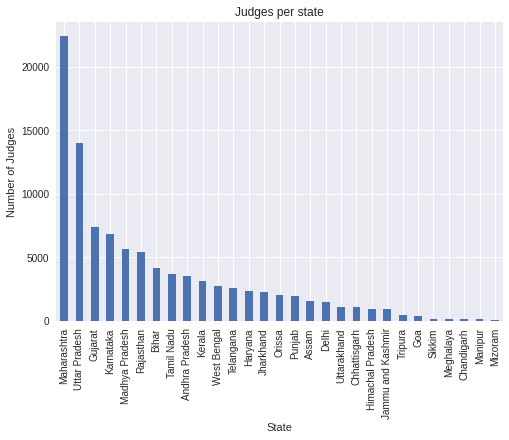

In [ ]:
df['state_name'].value_counts().plot(kind='bar',xlabel='State', ylabel='Number of Judges', title='Judges per state')

In [ ]:
import plotly.express as px

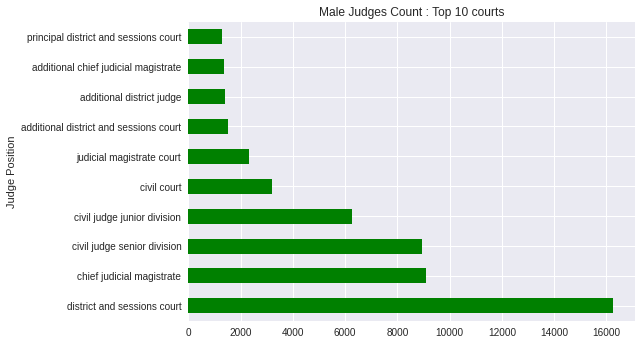

In [ ]:
female_df = df.loc[df['female_judge'] == 'male' ,'judge_position']
female_df.value_counts()[:10].plot(kind='barh' ,xlabel = 'Judge Position' ,ylabel='Number of Judge', color='green', title='Male Judges Count : Top 10 courts')

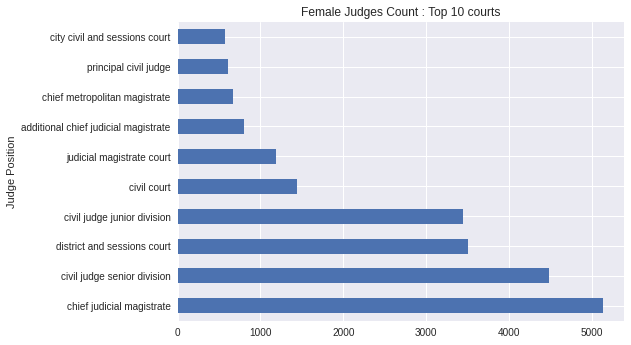

In [ ]:
male_df = df.loc[df['female_judge'] == 'female' ,'judge_position']
male_df.value_counts()[:10].plot(kind='barh',xlabel = 'Judge Position' ,ylabel='Number of Judge',title='Female Judges Count : Top 10 courts')

[Text(0, 0.5, 'Judge Designation'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Gender Wise Judge Designation')]

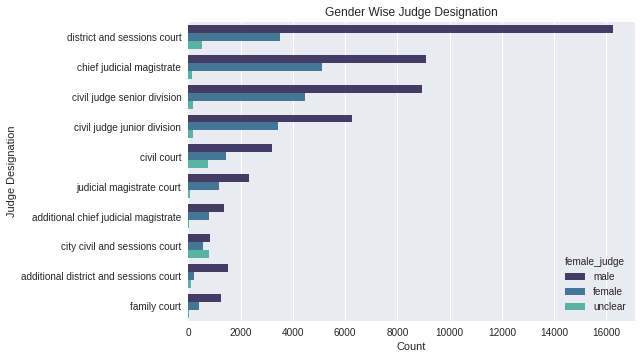

In [ ]:
chart = sns.countplot(data=df,
              y='judge_position',
              hue = 'female_judge',
              order = df['judge_position'].value_counts().iloc[:10].index,
              palette='mako'
              )
chart.set(xlabel='Count', ylabel='Judge Designation',title='Gender Wise Judge Designation')

**START DATE OF JUDGES PER GENDER**

In [ ]:
df_year = df[['female_judge','start_date']]
df_year = df_year.dropna(subset=['female_judge','start_date'] ,how ='all')
print(df_year)

      female_judge  start_date
0             male  20-09-2013
1             male  31-10-2013
2             male  21-02-2014
3             male  01-06-2016
4             male  06-06-2016
...            ...         ...
98473       female  21-04-2004
98474       female  16-01-2015
98475       female  09-12-2016
98476       female  15-05-2017
98477         male  28-01-2019

[98478 rows x 2 columns]


In [ ]:
df_year['start_year'] = df_year['start_date'].map(lambda x: int(x.split('-')[2]))
df_year

,female_judge,start_date,start_year
0,male,20-09-2013,2013
1,male,31-10-2013,2013
2,male,21-02-2014,2014
3,male,01-06-2016,2016
4,male,06-06-2016,2016
...,...,...,...
98473,female,21-04-2004,2004
98474,female,16-01-2015,2015
98475,female,09-12-2016,2016
98476,female,15-05-2017,2017


In [ ]:
df_male_year = df_year.groupby(['female_judge'])['start_year'].value_counts()['male']
df_male_year = df_male_year.sort_index()
df_male_year

start_year
1967        1
1968        1
1973        1
1978        6
1979        4
1980        2
1981        3
1982        3
1983        1
1984        3
1985        6
1986        1
1987        5
1988        5
1989        1
1990        6
1991        4
1992        6
1993        7
1994        6
1995       12
1996        4
1997        7
1998       14
1999       18
2000       27
2001       60
2002       27
2003       77
2004      155
2005      205
2006      321
2007      346
2008      646
2009      857
2010     1444
2011     2127
2012     3229
2013     4967
2014     7269
2015     8904
2016    10002
2017    10941
2018    12430
2019     3324
2020       55
Name: start_year, dtype: int64

In [ ]:
df_female_year = df_year.groupby(['female_judge'])['start_year'].value_counts()['female']
df_female_year = df_female_year.sort_index()
df_female_year

start_year
1966       1
1970       1
1974       2
1980       1
1983       1
1986       1
1988       1
1990       1
1991       1
1992       1
1993       2
1994       2
1995      12
1996       5
1997       9
1998       2
1999       8
2000      23
2001      28
2002      23
2003      37
2004      52
2005      49
2006     102
2007     124
2008     231
2009     298
2010     484
2011     686
2012    1296
2013    1780
2014    2535
2015    3257
2016    4422
2017    5086
2018    5398
2019    1235
2020       5
Name: start_year, dtype: int64

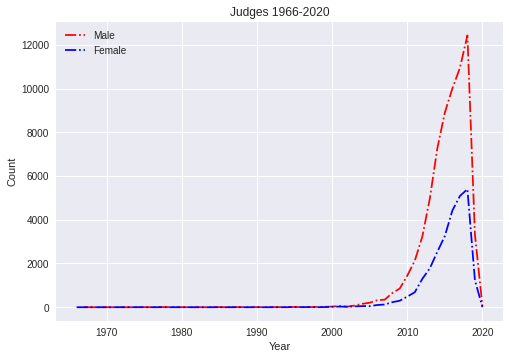

In [ ]:
plt.plot(df_male_year.index.values, df_male_year.values,'r-.', label='Male')
plt.plot(df_female_year.index.values, df_female_year.values,'b-.',label='Female')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()


plt.title("Judges 1966-2020")
plt.show()

In [ ]:
df['state_name'].value_counts().index,df['state_name'].value_counts().values

(Index(['Maharashtra', 'Uttar Pradesh', 'Gujarat', 'Karnataka',
        'Madhya Pradesh', 'Rajasthan', 'Bihar', 'Tamil Nadu', 'Andhra Pradesh',
        'Kerala', 'West Bengal', 'Telangana', 'Haryana', 'Jharkhand', 'Orissa',
        'Punjab', 'Assam', 'Delhi', 'Uttarakhand', 'Chhattisgarh',
        'Himachal Pradesh', 'Jammu and Kashmir', 'Tripura', 'Goa', 'Sikkim',
        'Meghalaya', 'Chandigarh', 'Manipur', 'Mizoram'],
       dtype='object'),
 array([22440, 14038,  7361,  6815,  5629,  5433,  4124,  3716,  3508,
         3107,  2702,  2589,  2338,  2285,  2038,  1941,  1578,  1496,
         1082,  1040,   915,   910,   444,   337,   167,   148,   140,
          113,    44]))

In [ ]:
state_num = pd.DataFrame({'State_name':df['state_name'].value_counts().index, 'Count': df['state_name'].value_counts().values})
state_num['State_name'] = state_num['State_name'].replace(to_replace='Orissa',value='Odisha')
state_num =state_num.rename({'State_name': 'state_name'} ,axis ='columns')
state_num

,state_name,Count
0,Maharashtra,22440
1,Uttar Pradesh,14038
2,Gujarat,7361
3,Karnataka,6815
4,Madhya Pradesh,5629
5,Rajasthan,5433
6,Bihar,4124
7,Tamil Nadu,3716
8,Andhra Pradesh,3508
9,Kerala,3107


In [ ]:
import json
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'browser'
india_states = json.load(open("/content/drive/MyDrive/Precog task files/states_india.geojson", "r"))

In [ ]:
df.isnull().sum()

ddl_judge_id          0
state_code            0
dist_code             0
court_no              0
judge_position        0
female_judge          0
start_date            0
end_date          18158
state_name            0
dtype: int64

In [ ]:
# Replace null values in end date by 'Serving'
df['end_date'].fillna('Serving',inplace =True)

In [ ]:
df.isnull().sum()

ddl_judge_id      0
state_code        0
dist_code         0
court_no          0
judge_position    0
female_judge      0
start_date        0
end_date          0
state_name        0
dtype: int64

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.0 MB/s eta 0:00:00


In [ ]:
!pip install shapely
!pip install shapefile

**JUDGES PER STATE CHOROPLETH MAP**

In [ ]:
import geopandas as gpd
# import shapefile as shp
from shapely.geometry import Point

In [ ]:
fp = '/content/drive/MyDrive/Precog task files/data/IND_adm1.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,105,IND,India,1,Andaman and Nicobar,IN.AN,0,None,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,IN.AP,0,None,State,State,None,None,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13..."
2,105,IND,India,3,Arunachal Pradesh,IN.AR,0,None,State,State,None,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,IN.AS,0,None,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,IN.BR,0,None,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


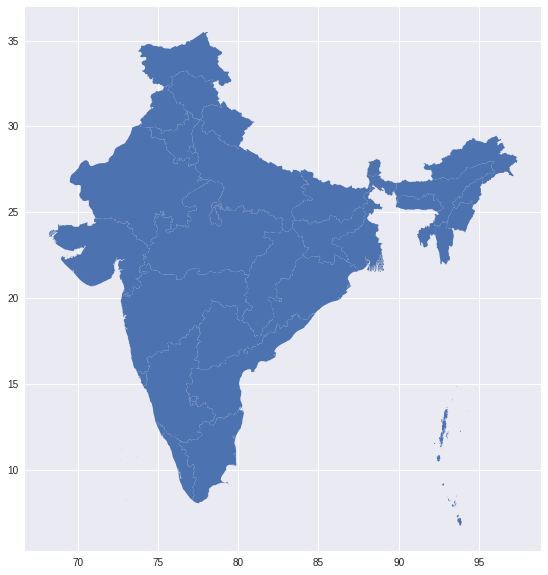

In [ ]:
map_df.plot(figsize=(20, 10))

In [ ]:
df_states = pd.read_csv('/content/drive/Shareddrives/Precog/Precog/Key/cases_state_key.csv')
df_states.head()

,year,state_code,state_name,pc11_state_name,pc11_state_id
0,2018,2,Andhra Pradesh,andhra pradesh,28
1,2011,2,Andhra Pradesh,andhra pradesh,28
2,2011,29,Telangana,andhra pradesh,28
3,2010,29,Telangana,andhra pradesh,28
4,2014,2,Andhra Pradesh,andhra pradesh,28


In [ ]:
df_states = df_states.drop_duplicates(subset=["state_code"], keep='first')

In [ ]:
df_states ,df_states.shape

(     year  state_code         state_name     pc11_state_name  pc11_state_id
 0    2018           2     Andhra Pradesh      andhra pradesh             28
 2    2011          29          Telangana      andhra pradesh             28
 18   2014           6              Assam               assam             18
 27   2013           8              Bihar               bihar             10
 36   2012          27         Chandigarh          chandigarh              4
 45   2013          18       Chhattisgarh        chhattisgarh             22
 54   2015          32     DNH at Silvasa  dadra nagar haveli             26
 63   2012          31      Diu and Daman           daman diu             25
 72   2018          30                Goa                 goa             30
 81   2011          17            Gujarat             gujarat             24
 90   2014          14            Haryana             haryana              6
 99   2015           5   Himachal Pradesh    himachal pradesh              2

In [ ]:
# Make column name same
map_df = map_df.rename({'NAME_1': 'state_name'}, axis = 'columns')
map_df

,ID_0,ISO,NAME_0,ID_1,state_name,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,105,IND,India,1,Andaman and Nicobar,IN.AN,0,None,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,105,IND,India,2,Andhra Pradesh,IN.AP,0,None,State,State,None,None,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13..."
2,105,IND,India,3,Arunachal Pradesh,IN.AR,0,None,State,State,None,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,105,IND,India,4,Assam,IN.AS,0,None,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,105,IND,India,5,Bihar,IN.BR,0,None,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."
5,105,IND,India,6,Chandigarh,IN.CH,0,None,Union Territor,Union Territory,None,None,"POLYGON ((76.80293 30.67548, 76.79437 30.66932..."
6,105,IND,India,7,Chhattisgarh,IN.CT,0,None,State,State,None,None,"POLYGON ((83.32760 24.09965, 83.34575 24.09707..."
7,105,IND,India,8,Dadra and Nagar Haveli,IN.DN,0,None,Union Territor,Union Territory,None,DAdra et Nagar Haveli|Dadra e Nagar Haveli,"POLYGON ((73.02468 20.09630, 73.01955 20.10502..."
8,105,IND,India,9,Daman and Diu,IN.DD,0,None,Union Territor,Union Territory,None,None,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20..."
9,105,IND,India,10,Goa,IN.GA,0,None,State,State,None,Gôa,"MULTIPOLYGON (((73.78181 15.35569, 73.78181 15..."


In [ ]:
map_df.shape , df_states.shape

((37, 13), (32, 5))

In [ ]:
state_num.shape ,map_df.shape

((29, 2), (37, 13))

In [ ]:
state_num.columns ,map_df.columns

(Index(['state_name', 'Count'], dtype='object'),
 Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'state_name', 'HASC_1', 'CCN_1',
        'CCA_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1', 'geometry'],
       dtype='object'))

In [ ]:
state_num['state_name'] , map_df['state_name'] 

(0           Maharashtra
 1         Uttar Pradesh
 2               Gujarat
 3             Karnataka
 4        Madhya Pradesh
 5             Rajasthan
 6                 Bihar
 7            Tamil Nadu
 8        Andhra Pradesh
 9                Kerala
 10          West Bengal
 11            Telangana
 12              Haryana
 13            Jharkhand
 14               Odisha
 15               Punjab
 16                Assam
 17                Delhi
 18          Uttarakhand
 19         Chhattisgarh
 20     Himachal Pradesh
 21    Jammu and Kashmir
 22              Tripura
 23                  Goa
 24               Sikkim
 25            Meghalaya
 26           Chandigarh
 27              Manipur
 28              Mizoram
 Name: state_name, dtype: object, 0        Andaman and Nicobar
 1             Andhra Pradesh
 2          Arunachal Pradesh
 3                      Assam
 4                      Bihar
 5                 Chandigarh
 6               Chhattisgarh
 7     Dadra and Nagar Haveli
 8

In [ ]:
df_merged = pd.merge(map_df,state_num,on='state_name', how='left')
df_merged.shape, df_merged.columns
df_merged.drop(columns=['ID_0', 'ISO', 'NAME_0', 'ID_1', 'HASC_1', 'CCN_1',
        'CCA_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1'
      ])

,state_name,geometry,Count
0,Andaman and Nicobar,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",NaN
1,Andhra Pradesh,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13...",3508.0
2,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",NaN
3,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",1578.0
4,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",4124.0
5,Chandigarh,"POLYGON ((76.80293 30.67548, 76.79437 30.66932...",140.0
6,Chhattisgarh,"POLYGON ((83.32760 24.09965, 83.34575 24.09707...",1040.0
7,Dadra and Nagar Haveli,"POLYGON ((73.02468 20.09630, 73.01955 20.10502...",NaN
8,Daman and Diu,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20...",NaN
9,Goa,"MULTIPOLYGON (((73.78181 15.35569, 73.78181 15...",337.0


In [ ]:
df_merged["Count"].fillna(0, inplace = True)
df_merged

,ID_0,ISO,NAME_0,ID_1,state_name,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Count
0,105,IND,India,1,Andaman and Nicobar,IN.AN,0,None,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",0.0
1,105,IND,India,2,Andhra Pradesh,IN.AP,0,None,State,State,None,None,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13...",3508.0
2,105,IND,India,3,Arunachal Pradesh,IN.AR,0,None,State,State,None,Agence de la Frontière du Nord-Est(French-obso...,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",0.0
3,105,IND,India,4,Assam,IN.AS,0,None,State,State,None,None,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",1578.0
4,105,IND,India,5,Bihar,IN.BR,0,None,State,State,None,None,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",4124.0
5,105,IND,India,6,Chandigarh,IN.CH,0,None,Union Territor,Union Territory,None,None,"POLYGON ((76.80293 30.67548, 76.79437 30.66932...",140.0
6,105,IND,India,7,Chhattisgarh,IN.CT,0,None,State,State,None,None,"POLYGON ((83.32760 24.09965, 83.34575 24.09707...",1040.0
7,105,IND,India,8,Dadra and Nagar Haveli,IN.DN,0,None,Union Territor,Union Territory,None,DAdra et Nagar Haveli|Dadra e Nagar Haveli,"POLYGON ((73.02468 20.09630, 73.01955 20.10502...",0.0
8,105,IND,India,9,Daman and Diu,IN.DD,0,None,Union Territor,Union Territory,None,None,"MULTIPOLYGON (((72.86014 20.47096, 72.86340 20...",0.0
9,105,IND,India,10,Goa,IN.GA,0,None,State,State,None,Gôa,"MULTIPOLYGON (((73.78181 15.35569, 73.78181 15...",337.0


Text(0.5, 1.0, 'Judges per State')

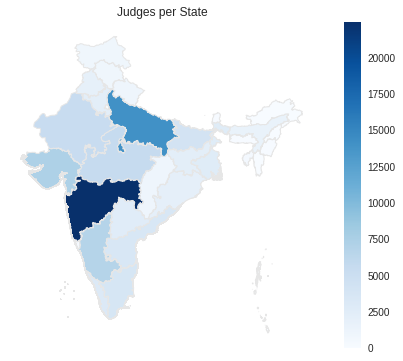

In [ ]:
# Judge state
fig, ax = plt.subplots(1, figsize=(10,6))
df_merged.plot(column='Count',cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
ax.set_title("Judges per State")

In [ ]:
df_male_num = pd.DataFrame(df.loc[df['female_judge'] == 'male' ,'state_name'])
df_male_num

,state_name
0,Maharashtra
1,Maharashtra
2,Maharashtra
3,Maharashtra
4,Maharashtra
...,...
98467,Goa
98469,Goa
98470,Goa
98472,Goa


**MALE JUDGES PER STATE CHOROPLETH MAP**

In [ ]:
df_male_num_final = pd.DataFrame({"state_name" : df_male_num['state_name'].value_counts().index , "Count" : df_male_num['state_name'].value_counts().values})
df_male_num_final.columns,df_male_num_final.head()

(Index(['state_name', 'Count'], dtype='object'),        state_name  Count
 0     Maharashtra  15756
 1   Uttar Pradesh  11054
 2       Karnataka   4376
 3  Madhya Pradesh   4359
 4           Bihar   3846)

In [ ]:
df_merged.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'state_name', 'HASC_1', 'CCN_1',
       'CCA_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1', 'geometry',
       'Count'],
      dtype='object')

In [ ]:
df_merged_male = pd.merge(map_df,df_male_num_final,on='state_name', how='left')
df_merged_male=df_merged_male.drop(columns=['ID_0', 'ISO', 'NAME_0', 'ID_1', 'HASC_1', 'CCN_1',
        'CCA_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1'])
df_merged_male.head()

,state_name,geometry,Count
0,Andaman and Nicobar,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",NaN
1,Andhra Pradesh,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13...",2266.0
2,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",NaN
3,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",937.0
4,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",3846.0


In [ ]:
df_merged_male["Count"].fillna(0, inplace = True)


Text(0.5, 1.0, 'Male Judges per State')

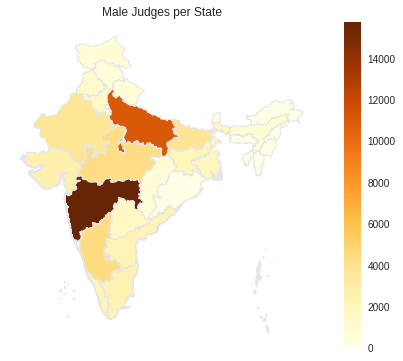

In [ ]:
# Male Judge per state
fig, ax = plt.subplots(1, figsize=(10,6))
df_merged_male.plot(column='Count',cmap='YlOrBr', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
ax.set_title("Male Judges per State")

**FEMALE JUDGES PER STATE**

In [ ]:
df_female_num = pd.DataFrame(df.loc[df['female_judge'] == 'female' ,'state_name'])
df_female_num

,state_name
5,Maharashtra
13,Maharashtra
20,Maharashtra
42,Maharashtra
62,Maharashtra
...,...
98471,Goa
98473,Goa
98474,Goa
98475,Goa


In [ ]:
df_female_num_final = pd.DataFrame({"state_name" : df_female_num['state_name'].value_counts().index , "Count" : df_female_num['state_name'].value_counts().values})
df_female_num_final.columns,df_female_num_final.head()

(Index(['state_name', 'Count'], dtype='object'),       state_name  Count
 0    Maharashtra   6231
 1  Uttar Pradesh   2945
 2        Gujarat   2249
 3      Karnataka   2064
 4      Rajasthan   1702)

In [ ]:
df_merged_female = pd.merge(map_df,df_female_num_final,on='state_name', how='left')
df_merged_female=df_merged_female.drop(columns=['ID_0', 'ISO', 'NAME_0', 'ID_1', 'HASC_1', 'CCN_1',
        'CCA_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1'])
df_merged_female.head()

,state_name,geometry,Count
0,Andaman and Nicobar,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",NaN
1,Andhra Pradesh,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13...",1226.0
2,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",NaN
3,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",613.0
4,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",275.0


In [ ]:
df_merged_female["Count"].fillna(df_merged_female["Count"].median(), inplace = True)

Text(0.5, 1.0, 'Female Judges per State')

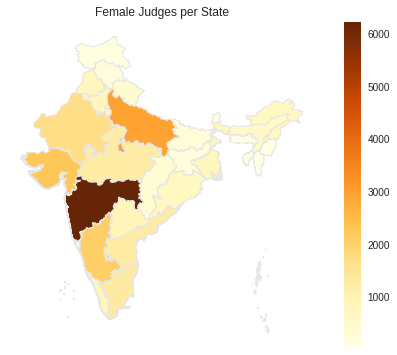

In [ ]:
# Female Judge per state
fig, ax = plt.subplots(1, figsize=(10,6))
df_merged_female.plot(column='Count',cmap='YlOrBr', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
ax.set_title("Female Judges per State")

**AVERAGE TIME SERVED PER STATE**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98478 entries, 0 to 98477
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ddl_judge_id    98478 non-null  int64 
 1   state_code      98478 non-null  int64 
 2   dist_code       98478 non-null  int64 
 3   court_no        98478 non-null  int64 
 4   judge_position  98478 non-null  object
 5   female_judge    98478 non-null  object
 6   start_date      98478 non-null  object
 7   end_date        98478 non-null  object
 8   state_name      98478 non-null  object
dtypes: int64(4), object(5)
memory usage: 9.5+ MB


In [ ]:
# Converting start_date and end_date to datetime objects
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98478 entries, 0 to 98477
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ddl_judge_id    98478 non-null  int64         
 1   state_code      98478 non-null  int64         
 2   dist_code       98478 non-null  int64         
 3   court_no        98478 non-null  int64         
 4   judge_position  98478 non-null  object        
 5   female_judge    98478 non-null  object        
 6   start_date      98478 non-null  datetime64[ns]
 7   end_date        80320 non-null  datetime64[ns]
 8   state_name      98478 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 9.5+ MB


In [ ]:
# Converting the time in days
df['time_served']= (df['end_date'] - df['start_date']).dt.total_seconds() / 60 / 60 / 24
df['time_served'] = (df['end_date'] - df['start_date']).dt.days

In [ ]:
df.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date,state_name,time_served
0,1,1,1,1,chief judicial magistrate,male,2013-09-20,2014-02-20,Maharashtra,153.0
1,2,1,1,1,chief judicial magistrate,male,2013-10-31,2014-02-20,Maharashtra,112.0
2,3,1,1,1,chief judicial magistrate,male,2014-02-21,2016-05-31,Maharashtra,830.0
3,4,1,1,1,chief judicial magistrate,male,2016-01-06,2016-06-06,Maharashtra,152.0
4,5,1,1,1,chief judicial magistrate,male,2016-06-06,2018-07-07,Maharashtra,761.0


In [ ]:
df_days_served = pd.DataFrame({'state_name':df['state_name'],'time_served':df['time_served']})

In [ ]:
df_days_served

,state_name,time_served
0,Maharashtra,153.0
1,Maharashtra,112.0
2,Maharashtra,830.0
3,Maharashtra,152.0
4,Maharashtra,761.0
...,...,...
98473,Goa,3494.0
98474,Goa,365.0
98475,Goa,322.0
98476,Goa,623.0


In [ ]:
df_days_served.fillna(0,inplace=True)

In [ ]:
df_days_sum = df_days_served.groupby('state_name').sum()
df_days_sum.head()

,time_served
state_name,
Andhra Pradesh,1279236.0
Assam,642776.0
Bihar,1343615.0
Chandigarh,72997.0
Chhattisgarh,421405.0


In [ ]:
df_days_mean = df_days_served.groupby('state_name').mean()
df_days_mean.rename(columns={'time_served':'mean_time_served'},inplace=True)

In [ ]:
df_days_mean.head()

,mean_time_served
state_name,
Andhra Pradesh,364.662486
Assam,407.335868
Bihar,325.803831
Chandigarh,521.407143
Chhattisgarh,405.197115


In [ ]:
df_merged_mean_serving_time = pd.merge(map_df,df_days_mean,on='state_name', how='left')
df_merged_mean_serving_time=df_merged_mean_serving_time.drop(columns=['ID_0', 'ISO', 'NAME_0', 'ID_1', 'HASC_1', 'CCN_1',
        'CCA_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1'])
df_merged_mean_serving_time.head()

,state_name,geometry,mean_time_served
0,Andaman and Nicobar,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",NaN
1,Andhra Pradesh,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13...",364.662486
2,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",NaN
3,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",407.335868
4,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",325.803831


In [ ]:
df_merged_mean_serving_time.fillna(0,inplace=True)

Text(0.5, 1.0, 'Mean tenure time per state')

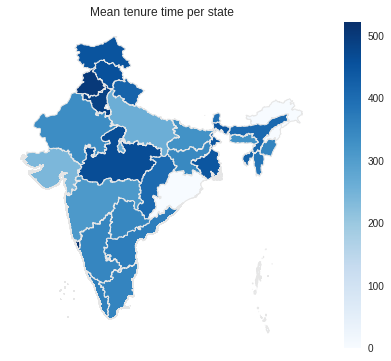

In [ ]:
# Mean serving time per state
fig, ax = plt.subplots(1, figsize=(10,6))
df_merged_mean_serving_time.plot(column='mean_time_served',cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
ax.set_title("Mean tenure time per state")

**AVERAGE TIME SERVED BY MALE JUDGE**

In [ ]:
df.columns

Index(['ddl_judge_id', 'state_code', 'dist_code', 'court_no', 'judge_position',
       'female_judge', 'start_date', 'end_date', 'state_name', 'time_served'],
      dtype='object')

In [ ]:
df_gender_time_served = df.groupby(['female_judge','state_name'])['time_served'].mean()
df_male__meantime_served = df_gender_time_served['male']
df_female_mean_time_served = df_gender_time_served['female']

In [ ]:
df_merged_mean_serving_time_male = pd.merge(map_df,df_male__meantime_served,on='state_name', how='left')
df_merged_mean_serving_time_male=df_merged_mean_serving_time_male.drop(columns=['ID_0', 'ISO', 'NAME_0', 'ID_1', 'HASC_1', 'CCN_1',
        'CCA_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1'])
df_merged_mean_serving_time_male.head()

,state_name,geometry,time_served
0,Andaman and Nicobar,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",NaN
1,Andhra Pradesh,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13...",441.368312
2,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",NaN
3,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",526.009818
4,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",398.405649


In [ ]:
df_merged_mean_serving_time_male.fillna(0,inplace=True)

Text(0.5, 1.0, 'Mean tenure time per state: MALE')

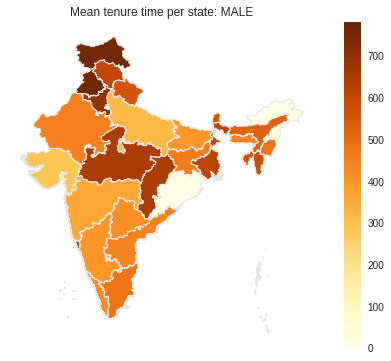

In [ ]:
# Mean serving time per state MALE
fig, ax = plt.subplots(1, figsize=(10,6))
df_merged_mean_serving_time_male.plot(column='time_served',cmap='YlOrBr', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
ax.set_title("Mean tenure time per state: MALE")

**AVERAGE TIME SERVED BY FEMALE JUDGE**


In [ ]:
df_merged_mean_serving_time_female = pd.merge(map_df,df_female_mean_time_served,on='state_name', how='left')
df_merged_mean_serving_time_female=df_merged_mean_serving_time_female.drop(columns=['ID_0', 'ISO', 'NAME_0', 'ID_1', 'HASC_1', 'CCN_1',
        'CCA_1', 'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1'])
df_merged_mean_serving_time_female.head()

,state_name,geometry,time_served
0,Andaman and Nicobar,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",NaN
1,Andhra Pradesh,"MULTIPOLYGON (((80.19264 13.52070, 80.19264 13...",425.623246
2,Arunachal Pradesh,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",NaN
3,Assam,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",568.113333
4,Bihar,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",307.528796


In [ ]:
df_merged_mean_serving_time_female.fillna(0,inplace=True)

Text(0.5, 1.0, 'Mean tenure time per state: FEMALE')

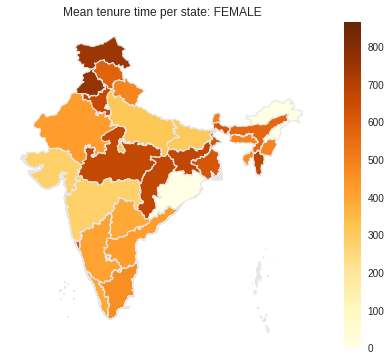

In [ ]:
# Mean serving time per state FEMALE
fig, ax = plt.subplots(1, figsize=(10,6))
df_merged_mean_serving_time_female.plot(column='time_served',cmap='YlOrBr', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')
ax.set_title("Mean tenure time per state: FEMALE")